In [29]:
from time import sleep
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle

In [18]:
df = pd.read_csv("cow_data.csv")

In [19]:
columns=df.columns[1:9]
df=df.iloc[0:len(df),[1,2,3,4,5,6,7,8]]
df.columns=columns

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28231 entries, 0 to 28230
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   性別      28231 non-null  object
 1   父牛      28231 non-null  object
 2   母の父     28231 non-null  object
 3   母の祖父    28231 non-null  object
 4   母の祖祖父   28231 non-null  object
 5   日令      28231 non-null  int64 
 6   体重      28231 non-null  int64 
 7   価格      28231 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 1.7+ MB


In [27]:
col_names = df.columns
for col_name in col_names:
    missing_num = sum(pd.isnull(df[col_name]))
    print(col_name,':missing record number is',missing_num)

性別 :missing record number is 0
父牛 :missing record number is 0
母の父 :missing record number is 0
母の祖父 :missing record number is 0
母の祖祖父 :missing record number is 0
日令 :missing record number is 0
体重 :missing record number is 0
価格 :missing record number is 0


In [28]:
df.corr()

,日令,体重,価格
日令,1.000000,0.067028,-0.078040
体重,0.067028,1.000000,0.594039
価格,-0.078040,0.594039,1.000000


<AxesSubplot:>

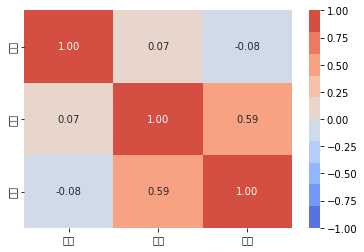

In [40]:
cor = df.corr()
plt.figure()
sns.heatmap(cor, cmap= sns.color_palette('coolwarm', 10), annot=True,fmt='.2f', vmin = -1, vmax = 1)

In [44]:
pd.options.display.float_format = '{:.2f}'.format
df.describe()

,日令,体重,価格
count,28231.00,28231.00,28231.00
mean,290.06,306.44,727174.84
std,14.94,37.82,161945.55
min,207.00,124.00,96800.00
25%,280.50,280.00,633600.00
50%,290.00,306.00,727100.00
75%,300.00,332.00,825000.00
max,379.00,479.00,2334200.00


In [49]:
df_copy = df.copy()
df_copy.rename(columns={"日令":"age", "体重":"weight" ,"価格":"price"}, inplace=True)

In [64]:
def grasp(colum):
    d = df_copy[colum].value_counts().to_dict()
    myList = d.items()
    myList = sorted(myList) 
    x, y = zip(*myList) 

    plt.plot(x, y)
    plt.show()

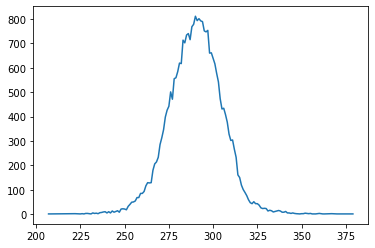

In [69]:
grasp('age')

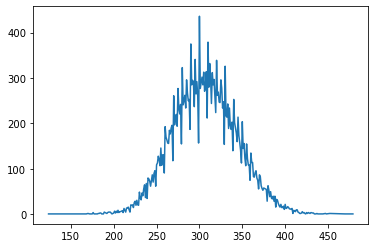

In [70]:
grasp('weight')

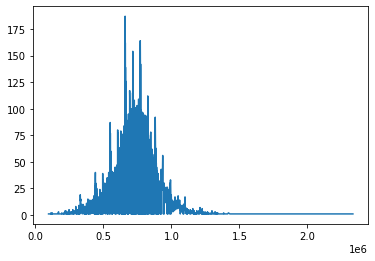

In [72]:
grasp('price')

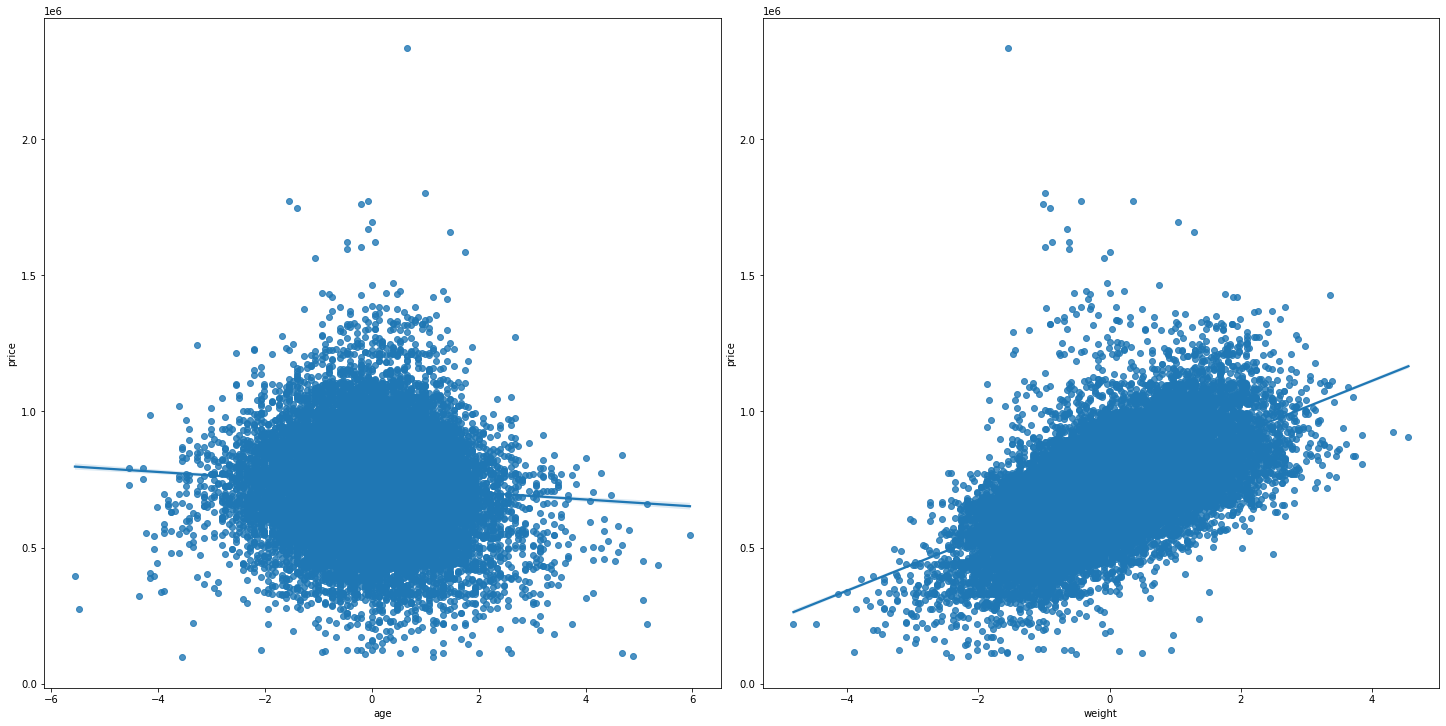

In [76]:
from sklearn.preprocessing import StandardScaler

standard_sc = StandardScaler()

column_list = ['age','weight']
x = df_copy.loc[:,column_list]
y = df_copy['price']
x = pd.DataFrame(data=standard_sc.fit_transform(x), columns=column_list)
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_list):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [4]:
df_dummied = pd.get_dummies(df)
df_dummied

,日令,体重,価格,性別_去勢,性別_雄,性別_雌,父牛_久富福,父牛_久晴茂,父牛_久百合,父牛_久福久,...,母の祖祖父_雲仙丸,母の祖祖父_頼山,母の祖祖父_飛騨白清,母の祖祖父_高栄,母の祖祖父_高森,母の祖祖父_高竜,母の祖祖父_鶴長,母の祖祖父_鶴１６５の９,母の祖祖父_鹿秀土井,母の祖祖父_２１世紀
0,292,276,618200,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,286,293,782100,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,297,305,697400,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,297,258,676500,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,297,301,712800,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28226,294,314,748000,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28227,290,318,806300,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28228,259,309,871200,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28229,293,353,875600,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [6]:
X = df_dummied.drop(columns = ['価格'])
y = df_dummied['価格']

train_X, test_X, train_y, test_y = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [7]:
dtrain = xgb.DMatrix(train_X, train_y)
dvalid = xgb.DMatrix(test_X, test_y)
params = {
    "objective" : "reg:squarederror",
    "eval_metric" : "rmse"
}

model = xgb.train(
    params = params,
    dtrain = dtrain,
    evals = [(dtrain, "train"), (dvalid, "valid")],
    num_boost_round = 100
)

pred = model.predict(xgb.DMatrix(test_X))

[0]	train-rmse:528094.51203	valid-rmse:529920.99056
[1]	train-rmse:378860.01786	valid-rmse:381076.97973
[2]	train-rmse:277045.37121	valid-rmse:279668.83490
[3]	train-rmse:209191.72429	valid-rmse:212354.26827
[4]	train-rmse:165607.34784	valid-rmse:169806.68272
[5]	train-rmse:139005.22451	valid-rmse:144312.00427
[6]	train-rmse:123171.10401	valid-rmse:129508.31561
[7]	train-rmse:114290.37664	valid-rmse:121432.37966
[8]	train-rmse:109382.51483	valid-rmse:117171.09307
[9]	train-rmse:106466.44368	valid-rmse:114857.12819
[10]	train-rmse:104736.26766	valid-rmse:113498.13258
[11]	train-rmse:103677.97118	valid-rmse:112777.66148
[12]	train-rmse:102940.93485	valid-rmse:112235.74353
[13]	train-rmse:102500.13641	valid-rmse:112008.58159
[14]	train-rmse:101949.60277	valid-rmse:111758.38538
[15]	train-rmse:101454.52160	valid-rmse:111565.36749
[16]	train-rmse:100677.38873	valid-rmse:110716.98672
[17]	train-rmse:100352.63746	valid-rmse:110436.99330
[18]	train-rmse:100061.99636	valid-rmse:110286.08557
[19

In [22]:
# with open('cow.pk', 'wb') as p:
#     pickle.dump(model, p)
    
# with open("cow.pk",mode="rb")as fp:
#     model=pickle.load(fp)

In [8]:
sex = input("性別を入力してください:")
father = input("1代祖を入力してください:")
gland = input("2代祖を入力してください:")
gege = input("3代祖を入力してください:")
got = input("4代祖を入力してください:")
age = input("日齢を入力してください:")
wight = input("体重を入力してください:")

df = df.append({'性別': sex, '父牛': father, '母の父': gland, '母の祖父': gege, '母の祖祖父': got, '日令': age, '体重': wight, '価格': 1}, ignore_index=True)

性別を入力してください: 去勢
1代祖を入力してください: 百合茂
2代祖を入力してください: 安福久
3代祖を入力してください: 菊花国
4代祖を入力してください: 紋次郎
日齢を入力してください: 270
体重を入力してください: 300


/var/folders/5w/f6yfy31s1fldqfnxdzv8ycj00000gn/T/ipykernel_51523/3585564614.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'性別': sex, '父牛': father, '母の父': gland, '母の祖父': gege, '母の祖祖父': got, '日令': age, '体重': wight, '価格': 1}, ignore_index=True)


In [9]:
df = pd.get_dummies(df)
df.tail(1)

,価格,性別_去勢,性別_雄,性別_雌,父牛_久富福,父牛_久晴茂,父牛_久百合,父牛_久福久,父牛_久茂国,父牛_久茂福,...,体重_439,体重_441,体重_443,体重_444,体重_447,体重_448,体重_452,体重_470,体重_479,体重_300
28231,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [10]:
def price_predict(df):
    column = df.columns[5:]

    for col in column:
        df[col] = df[col].astype('int')

    df_dummied = pd.get_dummies(df)

    e = df_dummied.tail(1)

    a = e.drop(columns = ['価格'])
    d = model.predict(xgb.DMatrix(a)) 
    df = df[:-1]
    return int(d),df

In [11]:
price_predict(df)[0]

KeyboardInterrupt: 

In [ ]:
df = price_predict(df)[1]

In [24]:
df.tail()

,性別,父牛,母の父,母の祖父,母の祖祖父,日令,体重,価格
28226,雌,諒太郎,福栄,平茂勝,安平,294,314,748000
28227,雌,諒太郎,福之国,福桜（宮）,安平,290,318,806300
28228,去勢,諒太郎,平茂晴,安糸福,北国７の８,259,309,871200
28229,去勢,諒太郎,隆之国,安福久,平茂勝,293,353,875600
28230,雌,鈴音,美津照重,第１花国,紋次郎,288,254,689700
